# Classical & Bayesian Estimation

### Recommended Book: Greene, W. H. (2003). Econometric analysis. Pearson Education India.
1. Handbook for econometric & statistical analysis and modeling: linear & nonlinear, panel & time-series data, LS & ML & GMM & Bayesian
2. Answers for most of interview questions reagrding statistics and modeling: multicollinearity
3. Implications on the connection between econometrics and machine learning: adjusted R-square, information criteria & regularization

#### Related Chapter:  
Chapter 5 - Hypothesis Testing

Chapter 16 - Bayesian Estimation

Chapter 12 - Estimation Frameworks in Econometrics

### Different Estimations
-  LS (BLUE) & ML & GMM & Bayesian
-  Full & Semi & Non-Parametric Estimation
-  Different Assumptions, Properties & Conclusions

## Hypothesis Testing

#### Linear Regression:
-  Estimation
-  Prediction
-  Hypothesis Testing: Test if a variable is relevant or its parameter is equal to some value based on data.

#### Baseline Regression Model:
$y = \beta\ X + \epsilon$

$y = \beta_1\ X_1 + \beta_2\ X_2 + \beta_3\ X_3 + \epsilon$

#### A Standard Dynamic Lending Model:
##### Tesing if bank's capital ratio matters for its lending decisison: $\eta\ = 0$ ?
$\Delta \ln L_{i,t} = \alpha_{i} + \theta_{t} + \sum_{j=1}^{4} \beta_j\ \Delta \ln L_{i,t-j} + \eta\ Capital_{i,t-1} + \sum_{j=1}^{4}\ \mu_j\ \Delta MP_{t-j} + \phi\ Z_{i,t-j}+\epsilon_{i,t}$

OLS assumption is violated, so OLS and FE are not consistent, use system GMM to reach a consistent and efficient estimation.

#### Questions:
How do we decide if the parameter is close to zero enough?

How certain are we?

How likely we are actually wrong?

#### Tesing if $\beta_1$ equals to something conditional on that $X_2$ and $X_3$ has been taken care:
$H_0: \beta_2 = 0$

$H_1: \beta_2 \neq 0$

Based on data


#### Method:
Neyman & Pearson (1933): Rejection region and acceptance regaion.  Or Critical Value.

Test how far the parameter suggested by data is from the assumed value or 0 to give a enough confidence that we can make a conclusion.

Linear & Nonlinear Restrictions: Wald tests (test restriction's closeness to 0), Fit based tests ($R^2$).

Should be in matrix form, but for simplicity:

Wald Test (significance or distance test): $W = \dfrac{\beta_1 - \beta_0}{\sqrt{\sigma^2}}$

Cannot observe population variance, use sample variance instead:

T Test: $t = \dfrac{b - \beta_0}{\sqrt{s^2}}$

Compare with critical value which is based on $\alpha$ (size) and degree of freedom (N-K)

In Short:
$t = \dfrac{b}{s}$, and usually compare with 1.96 if sample is large.  Units of standard deviation from 0, the large the t is, the more likely the parameter is not zero, or the more likely the variable is relevant.

#### Two types of Error
Type I Error: Fail to accept $H_0$

Type II Error: Fail to reject $H_0$

Size of the test: Probability of Type I error.  Probability of incorrectly reject the null.

Power of a test: 1 - Probability of Type II error.  Probability of correctly reject a false null.

P-value, probability of making type I error.  The smaller, the better.  The smaller the p-value is, the large the t statistics will be, the more significant the variable is, and the parameter is more likely to be non-zero.

Graph I created using tool from Website: http://www.imathas.com/stattools/norm.html
<img src="ttest.png" width="500">

Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283
<img src="precisionrecall.png" width = "350">

$Precision = \dfrac{TP}{TP + FP}$

$Recall = \dfrac{TP}{TP + FN}$

$H_0$ : Negative

$H_1$ : Positive

Type I Error: Fail to accept $H_0$, False Positive, 3

Type II Error: Fail to reject $H_0$, False Negative, 7

#### Assumptions
Consistent if power goes to 1 as sample size grows to infinity.  Testing procedure is consistent if testing based on a consistent estimator.  For linear regression, LS is best linear unbiased estimator (BLUE).

Linear Regression Model Assumptions: LS is BLUE, effecient and consistent
1. Linearity: Linear relationship between y and X, linear in parameter, not variable, for example: log and higher order.
2. Full rank: no exact linear relationship among X, or multicollinearity, identification problem.  Test VIF.
3. Exogeneity of the independent variables: no correlation between X and $\epsilon$, biased and inconsistent, omitted variable bias.  Use instruments or lag...
4. iid disturbance, no autocorrelation between disturbance, and homoscedasticity or constant variance $\sigma^2$.  Use robust variance
5. Stochastic or nonstochastic data
6. Normal distribution of disturbances

In the above lending model, assumption 3 is violated, LS is not consistent anymore.  So use GMM.

5 & 6 might be relaxed for large sample, 1 - 4 are strong

Small sample, t test, disturbances normally distributed: Can carry the test result to parameter.  Population variance cannot be observed, use sample variance instead.  As sample size increase, quality of t statistics approximation improves, asymptotically normal, no need for normally distributed disturbance.  Central Limit Theorem.  Wald test, Z test or $\chi^2$ might be more efficient than t.

#### Coding Example for A Simple Regression

#### Example from My Research

A Dynamic Bank Lending Regression Output From Stata, System GMM:
<img src="gmm.png">

A Presentation Report:
<img src="gmmp.png" width="500">

In [2]:
from IPython.display import Image
i = Image(filename='precisionrecall.png')

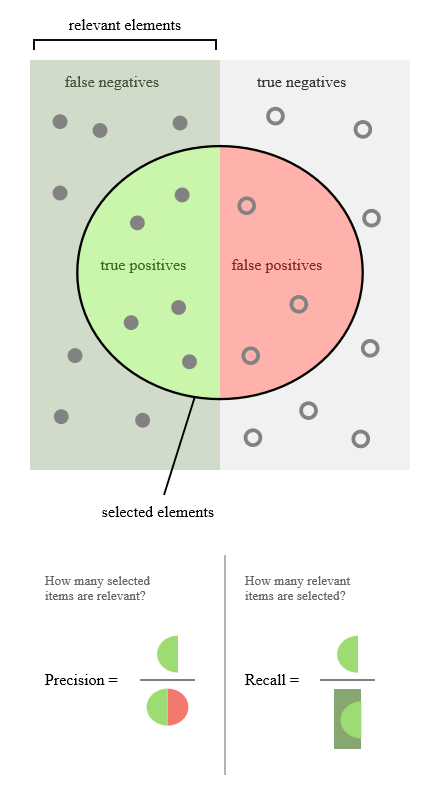

In [3]:
i

## Bayesian Estimation

#### Another Method:
Neyman-Pearson: All-or-noting, establish testing rule, either reject or not.

What if the test statistics is close to the boundary?  Should we reject or not?  And cannot incorporate results from other studies.

Bayesian: Middle ground, update prior beliefs.  Combining evidence from before (prior beliefs) with the current evidence (data) to reach a new conclusion (posterior beliefs).

caution to use, have to pick prior, subjective, but all estimation are pretty subjective.

parametric and non-parametric, relax assumption, choose estimator that requires less assumption, advance of GMM, heterscadasticity, likelihood based, GMM, Bayesian estimation.  Full, semi, to non-parametric estimation.  Relax assumption, but at a cost of weak conclusion from data.